In [23]:
#Movie Recommendation system

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_cols = ['user id' , 'item id' , 'rating' , 'timestamp']

In [4]:
data = pd.read_csv('u.data',sep='\t',names = data_cols)
data

,user id,item id,rating,timestamp
0,196,242,3.0,881250949.0
1,186,302,3.0,891717742.0
2,22,377,1.0,878887116.0
3,244,51,2.0,880606923.0
4,166,346,1.0,886397596.0
...,...,...,...,...
53149,642,1311,3.0,886569715.0
53150,405,29,4.0,885545639.0
53151,151,614,4.0,879528729.0
53152,592,678,2.0,882607690.0


In [5]:
item_col = ['item id' , 'movie title' , 'release date', 'video release date',
             ' IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy',
              'Film-Noir' ,'Horror' , 'Musical' ,'Mystery' , 'Romance' , 'Sci-Fi',
              'Thriller', 'War' , 'Western']
item=pd.read_csv('u.item',sep='|',encoding='latin-1',names=item_col)
item.head(10)

,item id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
data.shape

(53154, 4)

In [7]:
item.shape

(1682, 24)

In [8]:
movie=item[['item id','movie title']]
movie.head(10)

,item id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [9]:
dt = pd.merge(data,movie)
dt.head(10)

,user id,item id,rating,timestamp,movie title
0,196,242,3.0,881250949.0,Kolya (1996)
1,63,242,3.0,875747190.0,Kolya (1996)
2,226,242,5.0,883888671.0,Kolya (1996)
3,154,242,3.0,879138235.0,Kolya (1996)
4,306,242,5.0,876503793.0,Kolya (1996)
5,296,242,4.0,884196057.0,Kolya (1996)
6,34,242,5.0,888601628.0,Kolya (1996)
7,271,242,4.0,885844495.0,Kolya (1996)
8,201,242,4.0,884110598.0,Kolya (1996)
9,209,242,4.0,883589606.0,Kolya (1996)


In [10]:
dt.shape

(53154, 5)

In [11]:
dt.describe

<bound method NDFrame.describe of        user id  item id  rating    timestamp               movie title
0          196      242     3.0  881250949.0              Kolya (1996)
1           63      242     3.0  875747190.0              Kolya (1996)
2          226      242     5.0  883888671.0              Kolya (1996)
3          154      242     3.0  879138235.0              Kolya (1996)
4          306      242     5.0  876503793.0              Kolya (1996)
...        ...      ...     ...          ...                       ...
53149       13      897     1.0  886952422.0       Time Tracers (1995)
53150      181     1365     1.0  878963086.0   Johnny 100 Pesos (1993)
53151      751     1661     1.0  889299429.0       New Age, The (1994)
53152      201     1423     3.0  884140853.0  Walking Dead, The (1995)
53153      308     1515     4.0  887738346.0   Wings of Courage (1995)

[53154 rows x 5 columns]>

In [12]:
dt.count

<bound method DataFrame.count of        user id  item id  rating    timestamp               movie title
0          196      242     3.0  881250949.0              Kolya (1996)
1           63      242     3.0  875747190.0              Kolya (1996)
2          226      242     5.0  883888671.0              Kolya (1996)
3          154      242     3.0  879138235.0              Kolya (1996)
4          306      242     5.0  876503793.0              Kolya (1996)
...        ...      ...     ...          ...                       ...
53149       13      897     1.0  886952422.0       Time Tracers (1995)
53150      181     1365     1.0  878963086.0   Johnny 100 Pesos (1993)
53151      751     1661     1.0  889299429.0       New Age, The (1994)
53152      201     1423     3.0  884140853.0  Walking Dead, The (1995)
53153      308     1515     4.0  887738346.0   Wings of Courage (1995)

[53154 rows x 5 columns]>

In [13]:
dt['movie title'].value_counts().head(10)

Star Wars (1977)               301
Contact (1997)                 279
Fargo (1996)                   268
Scream (1996)                  266
Return of the Jedi (1983)      259
English Patient, The (1996)    241
Liar Liar (1997)               239
Toy Story (1995)               225
Twelve Monkeys (1995)          220
Pulp Fiction (1994)            220
Name: movie title, dtype: int64

In [14]:
dt['movie title'].value_counts().tail(10)

Tigrero: A Film That Was Never Made (1994)    1
Little City (1998)                            1
Invitation, The (Zaproszenie) (1986)          1
Open Season (1996)                            1
Best Men (1997)                               1
Lamerica (1994)                               1
Leading Man, The (1996)                       1
Coldblooded (1995)                            1
The Deadly Cure (1996)                        1
Wings of Courage (1995)                       1
Name: movie title, dtype: int64

In [15]:
dt['rating'].mean()

3.5364513762158296

In [16]:
# GroupBy

dt.groupby('movie title')['rating'].mean().sort_values(ascending=False).head(5)

movie title
Letter From Death Row, A (1998)                      5.0
Anna (1996)                                          5.0
Santa with Muscles (1996)                            5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Boys, Les (1997)                                     5.0
Name: rating, dtype: float64

In [17]:
#calculating mean rating

rating = pd.DataFrame(dt.groupby('movie title')['rating'].mean())
rating.head(10)

,rating
movie title,
'Til There Was You (1997),2.333333
1-900 (1994),2.500000
101 Dalmatians (1996),2.925926
12 Angry Men (1957),4.333333
187 (1997),2.900000
2 Days in the Valley (1996),3.275000
"20,000 Leagues Under the Sea (1954)",3.483871
2001: A Space Odyssey (1968),4.067669
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [18]:
rating['count'] = dt['movie title'].value_counts()
rating.head(10)

,rating,count
movie title,,
'Til There Was You (1997),2.333333,6
1-900 (1994),2.500000,2
101 Dalmatians (1996),2.925926,54
12 Angry Men (1957),4.333333,66
187 (1997),2.900000,20
2 Days in the Valley (1996),3.275000,40
"20,000 Leagues Under the Sea (1954)",3.483871,31
2001: A Space Odyssey (1968),4.067669,133
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,4


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Frequency--->')

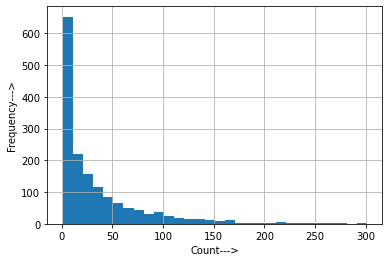

In [20]:
rating['count'].hist(bins=30)
plt.xlabel('Count--->')
plt.ylabel('Frequency--->')

In [51]:
#Pivot matrix

pivot_df = dt.pivot_table(index = 'user id', columns = 'movie title', values = 'rating')
pivot_df.head(20)

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,"Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown
user id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,5.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,NaN,...,NaN,3.0,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
rating.sort_values('count',ascending = False).head(10)

,rating,count
movie title,,
Star Wars (1977),4.315615,301
Contact (1997),3.845878,279
Fargo (1996),4.190299,268
Scream (1996),3.488722,266
Return of the Jedi (1983),4.000000,259
"English Patient, The (1996)",3.659751,241
Liar Liar (1997),3.100418,239
Toy Story (1995),3.888889,225
Pulp Fiction (1994),4.159091,220


In [53]:
# Finding movie reccomadation for star war

sw_ratings = pivot_df['Star Wars (1977)']
sw_ratings

user id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
798    NaN
800    NaN
802    NaN
803    NaN
804    NaN
Name: Star Wars (1977), Length: 801, dtype: float64

In [55]:
#creating similarty matrix

similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

movie title
'Til There Was You (1997)                1.000000
1-900 (1994)                            -1.000000
101 Dalmatians (1996)                    0.406307
12 Angry Men (1957)                      0.335458
187 (1997)                               0.000000
                                           ...   
Young Guns (1988)                        0.147347
Young Guns II (1990)                     0.354347
Young Poisoner's Handbook, The (1995)   -0.368958
Zeus and Roxanne (1997)                       NaN
unknown                                 -0.133631
Length: 1588, dtype: float64

In [56]:
corr_df = pd.DataFrame(similarity_sw,columns=['correlation'])
corr_df.dropna(inplace=True)
corr_df.sort_values('correlation',ascending=False)
corr_df.head(10)

,correlation
movie title,
'Til There Was You (1997),1.000000
1-900 (1994),-1.000000
101 Dalmatians (1996),0.406307
12 Angry Men (1957),0.335458
187 (1997),0.000000
2 Days in the Valley (1996),0.005093
"20,000 Leagues Under the Sea (1954)",0.258199
2001: A Space Odyssey (1968),0.355368
"39 Steps, The (1935)",0.090351


In [57]:
corr_df= corr_df.join(rating['count'])
corr_df.head(10)

,correlation,count
movie title,,
'Til There Was You (1997),1.000000,6
1-900 (1994),-1.000000,2
101 Dalmatians (1996),0.406307,54
12 Angry Men (1957),0.335458,66
187 (1997),0.000000,20
2 Days in the Valley (1996),0.005093,40
"20,000 Leagues Under the Sea (1954)",0.258199,31
2001: A Space Odyssey (1968),0.355368,133
"39 Steps, The (1935)",0.090351,32


In [58]:
corr_df[(corr_df['count']>200 )&(corr_df['correlation']>0.6) ].sort_values(by='correlation',ascending=False).head(20)

,correlation,count
movie title,,
Star Wars (1977),1.000000,301
Return of the Jedi (1983),0.784388,259
